In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
data_path='E:\PyProjects\DataSet\FireAI/data_multivar_imbalance.txt'
df=pd.read_csv(data_path,header=None)
# print(df.head()) # 没有问题
print(df.info()) # 查看数据信息，确保没有错误
dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1]
# print(dataset_X.head())
# print(dataset_X.info())
# print(dataset_y.head()) # 检查没问题
dataset_X=dataset_X.values
dataset_y=dataset_y.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
0    1200 non-null float64
1    1200 non-null float64
2    1200 non-null int64
dtypes: float64(2), int64(1)
memory usage: 28.2 KB
None


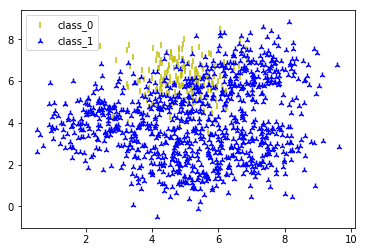

In [11]:
# 数据集可视化
def visual_2D_dataset(dataset_X,dataset_y):
    '''将二维数据集dataset_X和对应的类别dataset_y显示在散点图中'''
    assert dataset_X.shape[1]==2,'only support dataset with 2 features'
    plt.figure()
    classes=list(set(dataset_y)) 
    markers=['.',',','o','v','^','<','>','1','2','3','4','8'
             ,'s','p','*','h','H','+','x','D','d','|']
    colors=['b','c','g','k','m','w','r','y']
    for class_id in classes:
        one_class=np.array([feature for (feature,label) in 
                   zip(dataset_X,dataset_y) if label==class_id])
        plt.scatter(one_class[:,0],one_class[:,1],marker=np.random.choice(markers,1)[0],
                    c=np.random.choice(colors,1)[0],label='class_'+str(class_id))
    plt.legend()
    
visual_2D_dataset(dataset_X,dataset_y)

In [4]:
# 将整个数据集划分为train set和test set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y=train_test_split(
    dataset_X,dataset_y,test_size=0.25,random_state=42)

# 如果用线性SVM分类器来进行分类，看看是什么结果
# 使用线性核函数初始化一个SVM对象。
from sklearn.svm import SVC
classifier=SVC(kernel='linear') # 构建线性分类器
classifier.fit(train_X,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# 将分类器绘制到图中
def plot_classifier(classifier, X, y):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0 # 计算图中坐标的范围
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    step_size = 0.01 # 设置step size
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    # 构建网格数据
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape) 
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', 
                linewidth=1, cmap=plt.cm.Paired)
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])), int(max(X[:, 0])), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])), int(max(X[:, 1])), 1.0)))

    plt.show()

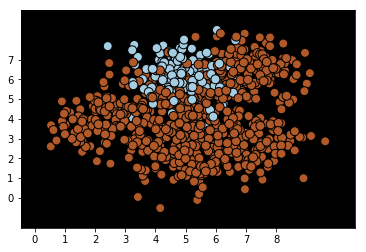

             precision    recall  f1-score   support

    Class-0       0.00      0.00      0.00       151
    Class-1       0.83      1.00      0.91       749

avg / total       0.69      0.83      0.76       900



e:\programsoft\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
# 模型在训练集上的性能报告：
from sklearn.metrics import classification_report
plot_classifier(classifier,train_X,train_y)  # 分类器在训练集上的分类效果
target_names = ['Class-0', 'Class-1']
y_pred=classifier.predict(train_X)
print(classification_report(train_y, y_pred, target_names=target_names))

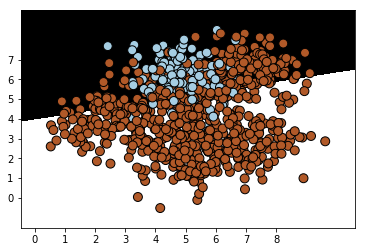

             precision    recall  f1-score   support

    Class-0       0.35      0.86      0.50       151
    Class-1       0.96      0.68      0.79       749

avg / total       0.86      0.71      0.74       900



In [7]:
# 看来直接使用简单的线性SVM分类器难以将class_0区分出来，故而我们要调整数据集中样本的数量权重
classifier2=SVC(kernel='linear',class_weight='balanced') # 比上面的分类器增加了 class_weight=‘balanced'参数
classifier2.fit(train_X,train_y)

# 模型在训练集上的性能报告：
plot_classifier(classifier2,train_X,train_y)  # 分类器在训练集上的分类效果
target_names = ['Class-0', 'Class-1']
y_pred2=classifier2.predict(train_X)
print(classification_report(train_y, y_pred2, target_names=target_names))